In [1]:
from time import time
from primitives import SOL, Not, \
                       IntVal, Inserter, dir_to_disp, \
                       Rectangle, non_intersecting_rectangles, AssemblyMachine, connection
                        

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as P
import numpy as np
def plot_inserter(ins: Inserter, color='y'):
    p = ins.pos.eval()
    tgt = ins.sink().eval()
    d = ins.dir.eval()
    disp = dir_to_disp(d)
    plt.arrow((p.x+tgt.x)/2 - disp[0]/4, (p.y+tgt.y)/2-disp[1]/4, disp[0] / 50, disp[1] / 50, 
              width=0.1, length_includes_head=True, head_length=0.5,
              color=color)
    
def plot_rectangle(f: Rectangle, color='r'):
    p = f.pos.eval()
    r = P.Rectangle((p.x-0.5+0.2, p.y-0.5+0.2), f.size_x-0.4, f.size_y-0.4, color=color)
    plt.gca().add_patch(r)
    
def plot_grid(sx, sy):
    plt.xlim(-sx,sy)
    plt.ylim(-sx,sy)
    plt.grid()
    plt.gca().xaxis.set_ticks(np.arange(-sx-0.5,sy))
    plt.gca().yaxis.set_ticks(np.arange(-sx-0.5,sy));
    
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
#    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
    
    plt.tick_params(
    axis='y',          # changes apply to the x-axis
#    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False)

# Manual construction

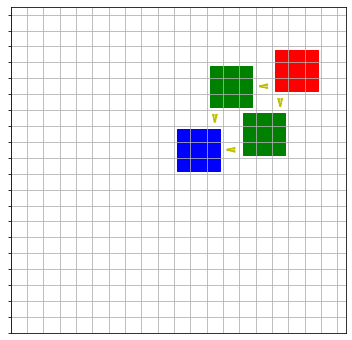

In [48]:
SOL.fresh_solver()

m1 = AssemblyMachine()
m2_1 = AssemblyMachine()
m2_2 = AssemblyMachine()
m3 = AssemblyMachine()

ins1 = Inserter()
ins2 = Inserter()
ins3 = Inserter()
ins4 = Inserter()

SOL.add(connection(m1, ins1, m2_1))
SOL.add(connection(m1, ins2, m2_2))
SOL.add(connection(m2_1, ins3, m3))
SOL.add(connection(m2_2, ins4, m3))

SOL.add(non_intersecting_rectangles(m1,m2_1,m2_2,m3))

SOL.model()


plt.figure(figsize=(6,6))

for ins in [ins1, ins2, ins3, ins4]:
    plot_inserter(ins, color='y')
    
plot_rectangle(m1, color='r')
plot_rectangle(m2_1, color='g')
plot_rectangle(m2_2, color='g')
plot_rectangle(m3, color='b')

plot_grid(10,10)

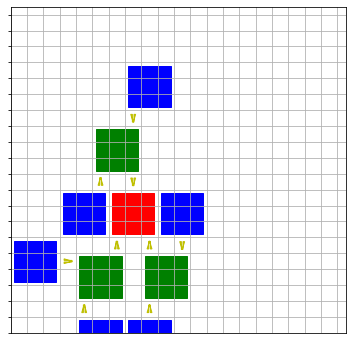

In [13]:
SOL.fresh_solver()

inserters = []
machines = []

def new_machine(color):
    m = AssemblyMachine()
    m.color = color
    machines.append(m)
    return m

def new_inserter():
    ins = Inserter()
    inserters.append(ins)
    return ins

r = 'r'
g = 'g'
b = 'b'

m1_1 = new_machine(b)
m1_2 = new_machine(b)

m1_3 = new_machine(b)
m1_4 = new_machine(b)

m1_5 = new_machine(b)
m1_6 = new_machine(b)

m2_1 = new_machine(g)
m2_2 = new_machine(g)
m2_3 = new_machine(g)

m3 = new_machine(r)

SOL.add(connection(m1_1, new_inserter(), m2_1))
SOL.add(connection(m1_2, new_inserter(), m2_1))

SOL.add(connection(m1_3, new_inserter(), m2_2))
SOL.add(connection(m1_4, new_inserter(), m2_2))

SOL.add(connection(m1_5, new_inserter(), m2_3))
SOL.add(connection(m1_6, new_inserter(), m2_3))

SOL.add(connection(m2_1, new_inserter(), m3))
SOL.add(connection(m2_2, new_inserter(), m3))
SOL.add(connection(m2_3, new_inserter(), m3))

SOL.add(non_intersecting_rectangles(machines))

SOL.model()


plt.figure(figsize=(6,6))

for ins in inserters:
    plot_inserter(ins, color='y')

for m in machines:
    plot_rectangle(m, color=m.color)


plot_grid(10,10)

# Using Factory Object

In [1]:
from factory import Factory
from plotting import plot_factory
from time import time

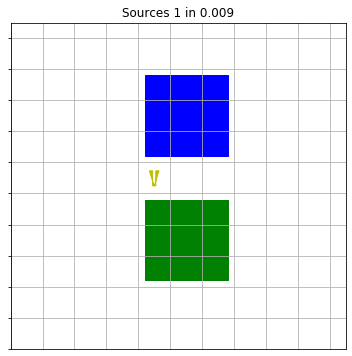

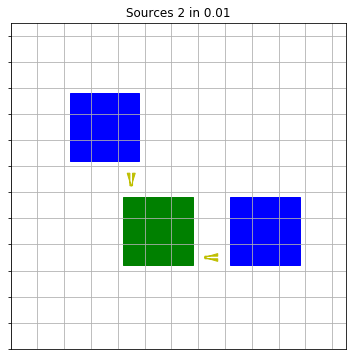

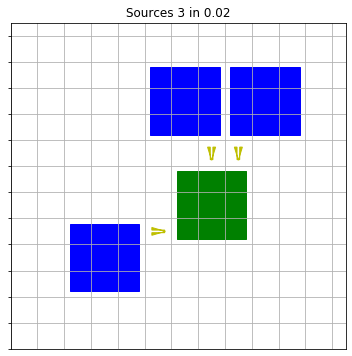

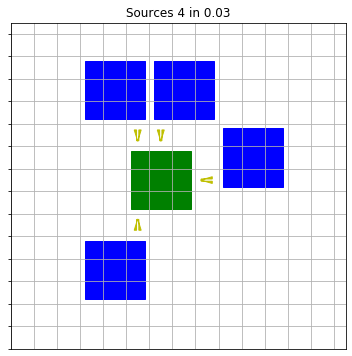

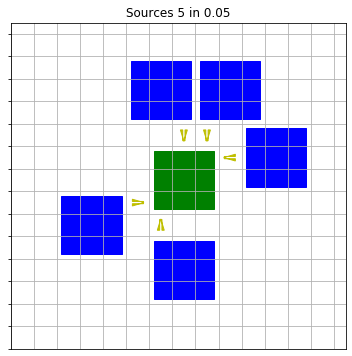

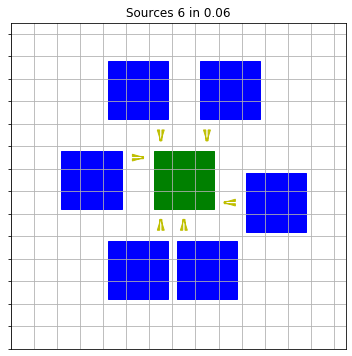

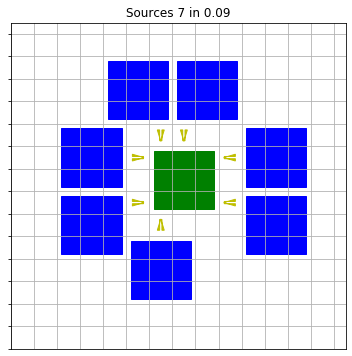

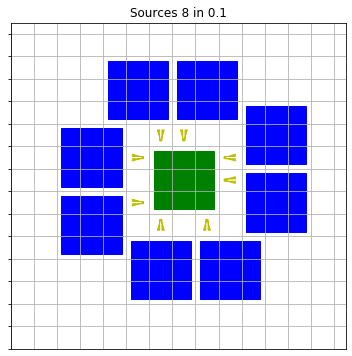

In [2]:
for n in range(1,100):
    f = Factory()
    sources = [f.new_machine('b') for _ in range(n)]
    sink = m1 = f.new_machine('g')
    for s in sources:
        f.connect_with_inserter(s, sink)
    
    t0 = time()
    if not f.finalize_and_model():
        break
    dt = time() - t0

    plot_factory(f, title=f'Sources {n} in {dt:.1}', size=(6,6), show=True)

# Two-stage processing

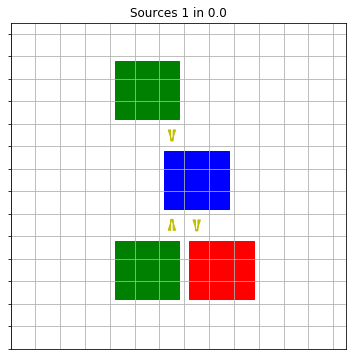

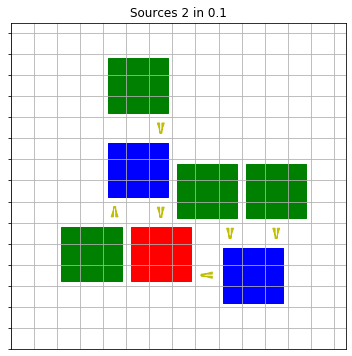

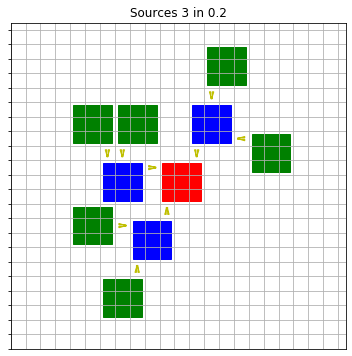

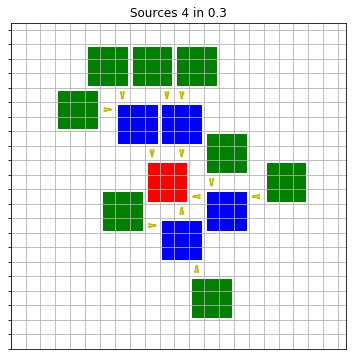

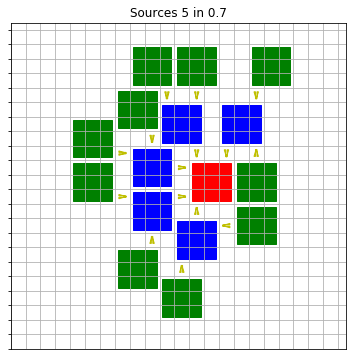

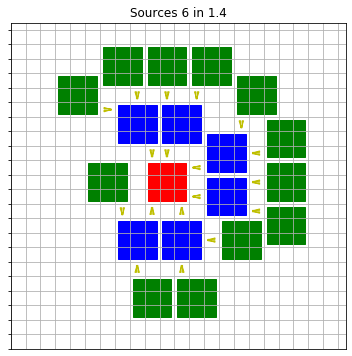

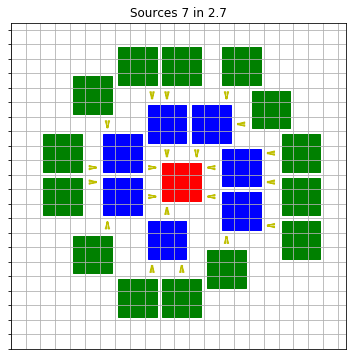

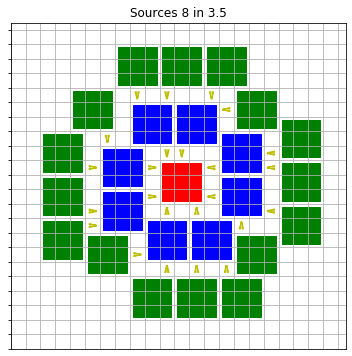

In [6]:
K = 2
times = []
for n in range(1,100):
    f = Factory()
    sources = [f.new_machine('b') for _ in range(n)]
    sink = m1 = f.new_machine('r')
    for s in sources:
        for k in range(K):
            m = f.new_machine('g')
            f.connect_with_inserter(m, s)
        f.connect_with_inserter(s, sink)
    
    t0 = time()
    if not f.finalize_and_model():
        break
    dt = time() - t0
    times.append(dt)

    plot_factory(f, title=f'Sources {n} in {dt:.1f}', size=(6,6), show=True)

In [7]:
import matplotlib.pyplot as plt

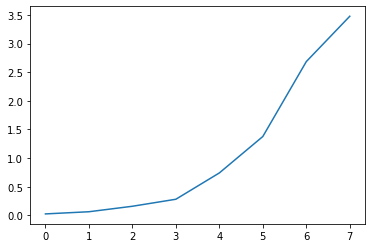

In [8]:
plt.plot(times)

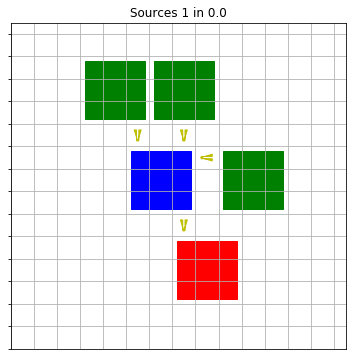

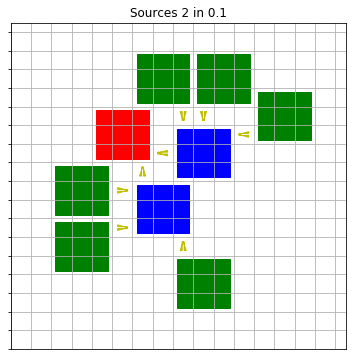

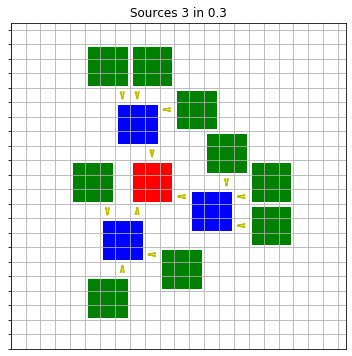

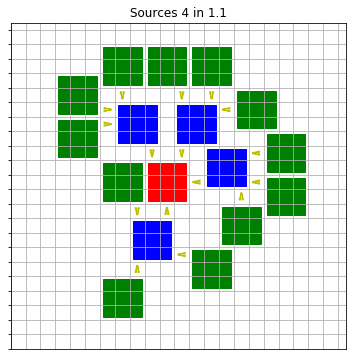

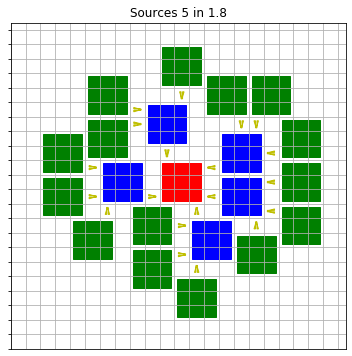

In [9]:
K = 3
times = []
for n in range(1,100):
    f = Factory()
    sources = [f.new_machine('b') for _ in range(n)]
    sink = m1 = f.new_machine('r')
    for s in sources:
        for k in range(K):
            m = f.new_machine('g')
            f.connect_with_inserter(m, s)
        f.connect_with_inserter(s, sink)
    
    t0 = time()
    if not f.finalize_and_model():
        break
    dt = time() - t0
    times.append(dt)

    plot_factory(f, title=f'Sources {n} in {dt:.1f}', size=(6,6), show=True)

# Adding belts

In [ ]:
N_PROD=1
N_CONS=1

f = Factory()
prods = [f.new_machine('b') for _ in range(N_PRODS)]
cons = [f.new_machine('g') for _ in range(N_CONS)]
sbelt = f.new_segmented_belt()




for s in sources:
    for k in range(K):
        m = f.new_machine('g')
        f.connect_with_inserter(m, s)
    f.connect_with_inserter(s, sink)

t0 = time()
if not f.finalize_and_model():
    break
dt = time() - t0
times.append(dt)

plot_factory(f, title=f'Sources {n} in {dt:.1f}', size=(6,6), show=True)